In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_img():
    blank_img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300), fontFace=font,fontScale= 5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img

In [3]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

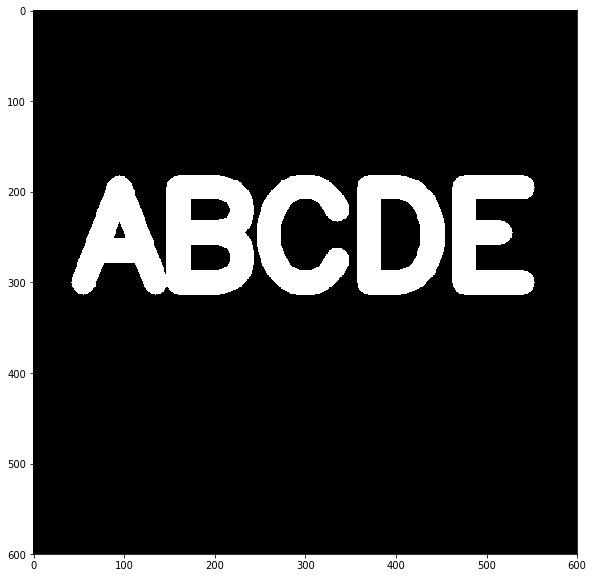

In [5]:
img = load_img()
display_img(img)

In [30]:
#Erosion
kernel = np.ones((5,5), dtype=np.uint8)

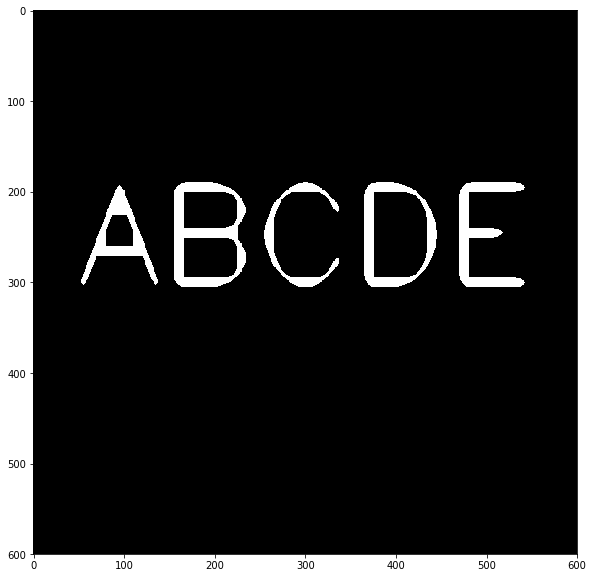

In [10]:
result = cv2.erode(img, kernel, iterations=4)
display_img(result)

In [11]:
#Opening (Helpful in removing background noise)
img = load_img()

white_noise = np.random.randint(low=0, high=2, size=(600,600))

In [13]:
# display_img(white_noise)
img.max()

255.0

In [14]:
white_noise = white_noise * 255

In [16]:
white_noise #Now its the same scale

array([[255, 255, 255, ..., 255,   0, 255],
       [  0, 255,   0, ...,   0, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ..., 255,   0,   0],
       [  0,   0, 255, ..., 255, 255, 255],
       [  0, 255,   0, ..., 255, 255,   0]])

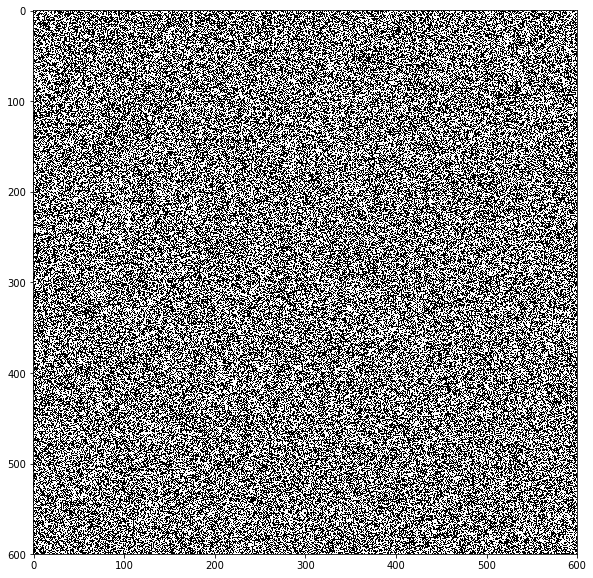

In [17]:
display_img(white_noise)

In [18]:
noise_img = white_noise + img

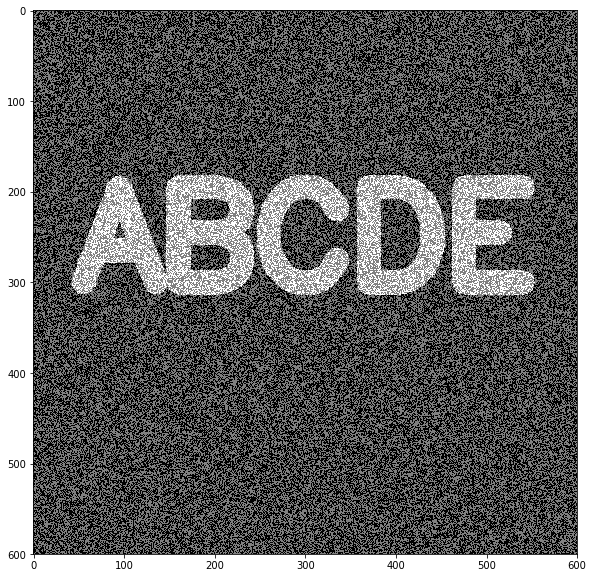

In [19]:
display_img(noise_img)

In [20]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)

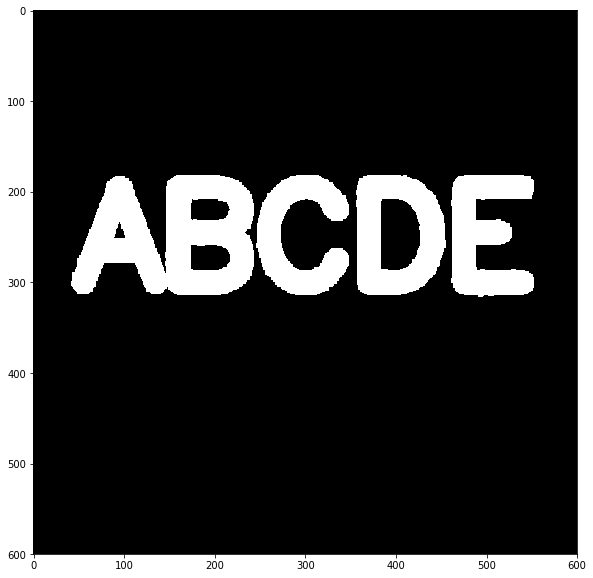

In [21]:
display_img(opening)

In [22]:
#Removing foreground noise
img = load_img()
black_noise = np.random.randint(low=0, high=2, size=(600,600))

In [23]:
black_noise = black_noise * -255

In [24]:
black_noise

array([[-255,    0, -255, ...,    0, -255,    0],
       [   0, -255,    0, ...,    0,    0,    0],
       [   0, -255,    0, ...,    0, -255, -255],
       ...,
       [-255, -255, -255, ..., -255,    0, -255],
       [-255,    0, -255, ...,    0,    0,    0],
       [-255,    0,    0, ...,    0, -255, -255]])

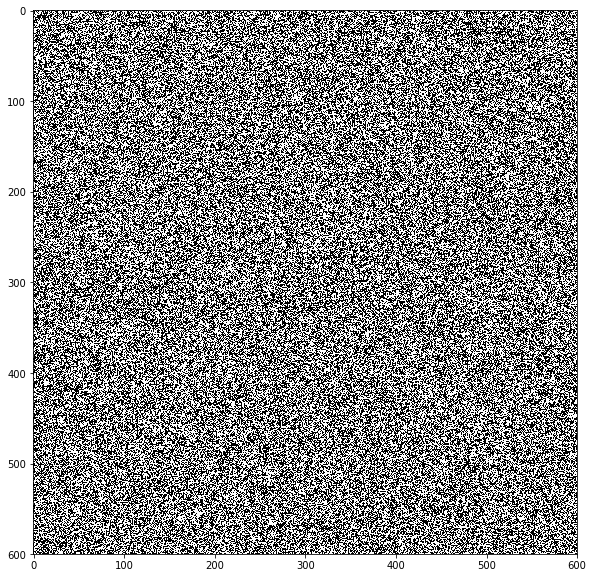

In [25]:
display_img(black_noise)

In [26]:
black_noise_img = img + black_noise

In [27]:
black_noise_img[black_noise_img == -255] = 0 #Because 0 should be smallest value

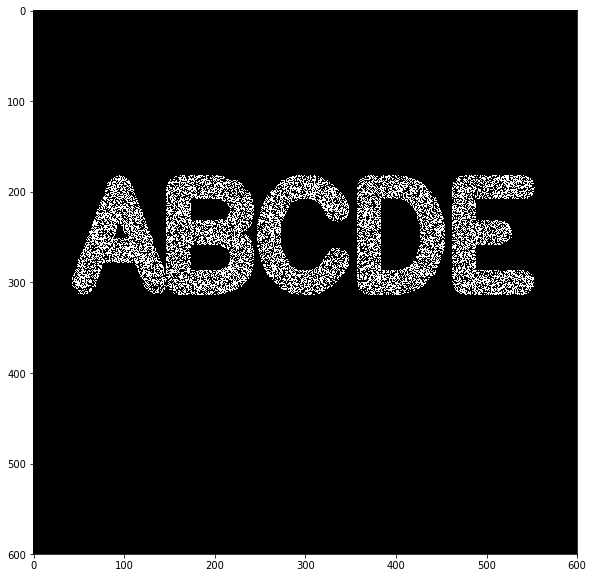

In [28]:
display_img(black_noise_img)

In [31]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)

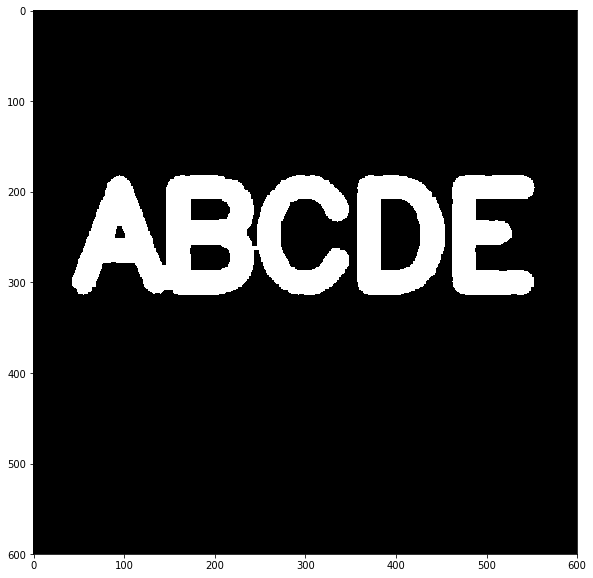

In [32]:
display_img(closing)

In [33]:
img = load_img()

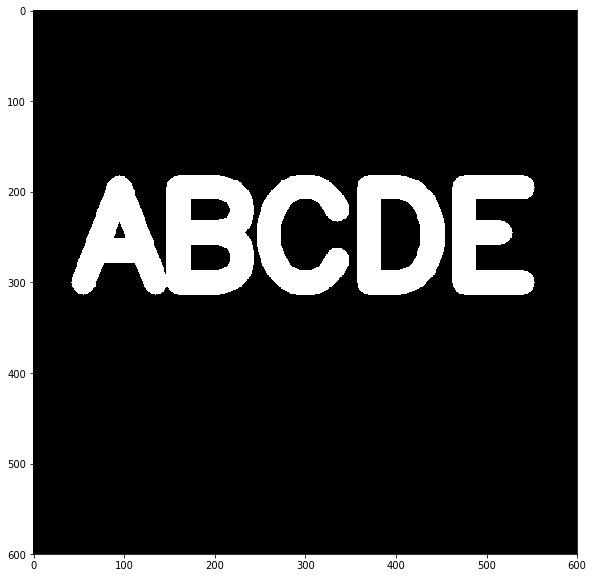

In [34]:
display_img(img)

In [35]:
#Morphological gradient (method of edge detection)
#The difference between opening and closing
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

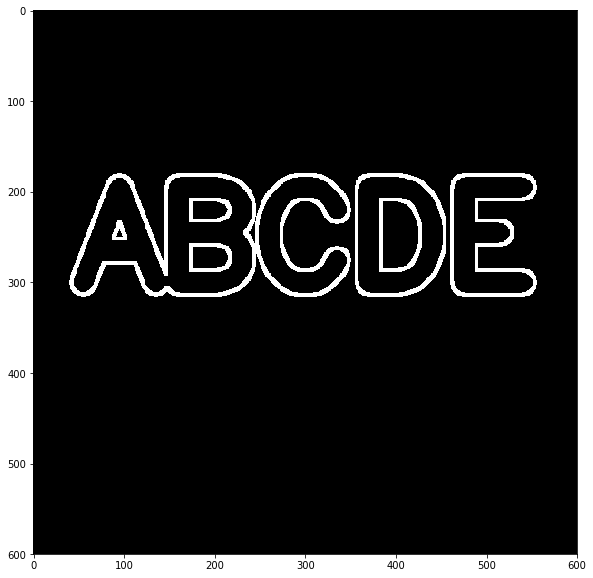

In [36]:
display_img(gradient)